In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os.path
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
fig_width = 8
fig_height = 6

In [3]:
from MyML.helper.plotting import save_fig

In [4]:
folder = '/home//chiroptera/QCThesis/datasets/gauss10e6_overlap/results/'
results_name = "results_kmin.csv"

In [65]:
data_name = "data.csv"
gt_name = "gt.csv"

CPU times: user 37.1 s, sys: 900 ms, total: 38 s
Wall time: 37.9 s
CPU times: user 27 s, sys: 536 ms, total: 27.5 s
Wall time: 27.5 s
(10000000, 2) float32
(10000000,) int32


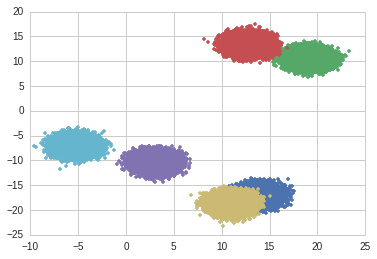

In [7]:
%time data = np.genfromtxt(folder + data_name, delimiter=',', dtype=np.float32)
%time gt = np.genfromtxt(folder + gt_name, delimiter=',', dtype=np.int32)
print data.shape, data.dtype
print gt.shape, gt.dtype

fid_data = plt.figure()
for l in np.unique(gt):
    rows_l = np.where(gt == l)[0][::100]
    plt.plot(data[rows_l,0], data[rows_l,1], '.')

In [17]:
res[['n_samples', 'rule', 'type_mat','t_ensemble','t_sl', 'accuracy_CI', 't_sl_disk','accuracy_CI_disk']][res['n_samples']>1e5]

,n_samples,rule,type_mat,t_ensemble,t_sl,accuracy_CI,t_sl_disk,accuracy_CI_disk
1100,250000,sqrt,sparse complete,1413.922181,NaN,NaN,7622.505602,0.667828
1101,250000,sqrt,sparse condensed const,663.900344,NaN,NaN,3214.545022,0.667828
1102,250000,sqrt,sparse condensed linear,662.722575,77.010901,0.667828,3216.397171,0.667828
1103,250000,2sqrt,sparse complete,653.489821,76.423691,0.667828,3380.734575,0.667828
1104,250000,2sqrt,sparse condensed const,317.870635,34.332228,0.667828,1648.339109,0.667828
1105,250000,2sqrt,sparse condensed linear,317.727850,34.598544,0.667828,1635.298299,0.667828
1106,250000,"sk=sqrt_2,th=30%",sparse complete,369.351826,42.680908,0.667828,1815.226312,0.667828
1107,250000,"sk=sqrt_2,th=30%",sparse condensed const,188.910202,19.734840,0.667828,897.091265,0.667828
1108,250000,"sk=sqrt_2,th=30%",sparse condensed linear,188.741678,19.729312,0.667828,891.981286,0.667828
1109,250000,"sk=300,th=30%",sparse complete,465.261562,54.239418,0.667828,2303.246192,0.667828


In [7]:
res = pd.read_csv(folder + results_name)
for col in res.columns:
    print col

Unnamed: 0
n_samples
rule
kmin
kmax
t_ensemble
t_build
t_sl
t_accuracy_CI
t_accuracy_H
t_sl_disk
t_store
t_accuracy_CI_disk
t_accuracy_H_disk
biggest_cluster
type_mat
n_assocs
n_max_degree
min_degree
max_degree
mean_degree
std_degree
accuracy_CI
accuracy_H
sl_clusts
accuracy_CI_disk
accuracy_H_disk
sl_clusts_disk
round
disk


In [85]:
res['csr_max_row'] = res.biggest_cluster * 3
res['csr_topped'] = (res['csr_max_row'] == res['max_degree']) & res.type_mat
res = res[np.logical_not(res.n_samples.isnull())]
#res.max_assoc = res.max_assoc.apply(lambda s: int(s.strip('()').split(',')[0]))
res['sparsity'] = res.n_assocs * 1.0 / (res.n_samples ** 2)
res['samples_per_kmin']=res['n_samples'] / res['kmin']

In [90]:
by_rule_n = res.groupby(by=["rule", "n_samples", "type_mat"])
rule_n_mean = by_rule_n.apply(np.mean)
rule_n_mean = rule_n_mean[['kmin','kmax','t_ensemble','biggest_cluster',
                           't_build','mean_degree','std_degree','min_degree',
                           'max_degree','n_max_degree','sparsity','csr_max_row','csr_topped',
                           'samples_per_kmin',
                           'accuracy_CI', 't_sl', 't_accuracy_CI', 'sl_clusts']]
rule_n_mean = rule_n_mean.reset_index()

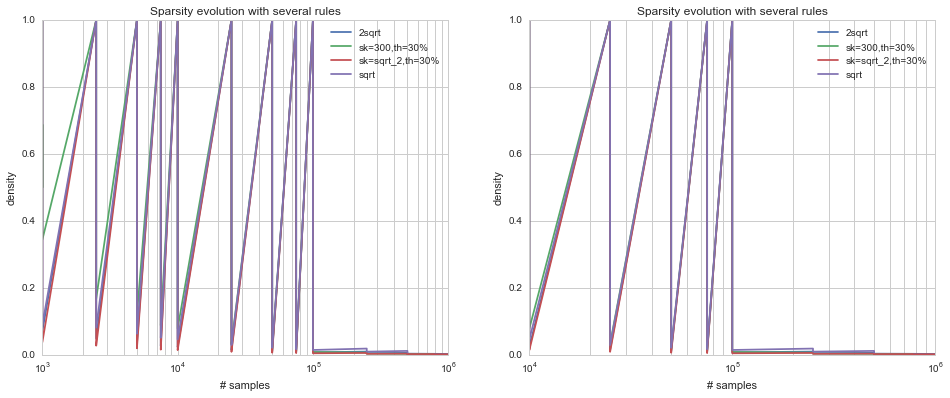

In [28]:
fig1 = plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette("deep", 6))

ax = fig1.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
#ax.set_yscale("log")
    
ax = fig1.add_subplot(122)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e4
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)    
    
ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity evolution with several rules")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")

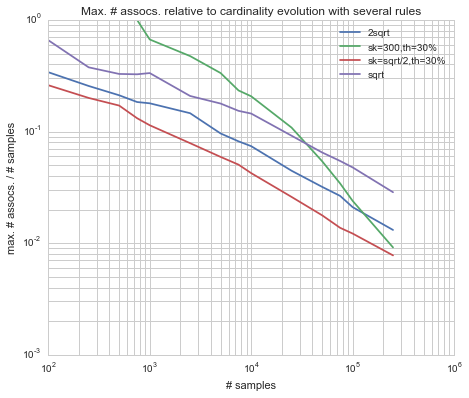

In [17]:
fig2 = plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette("deep", 6))

ax = fig2.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.max_degree[idx] / grp.n_samples[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("max. # assocs. / # samples")
ax.set_title("Max. # assocs. relative to cardinality evolution with several rules")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
ax.set_yscale("log")

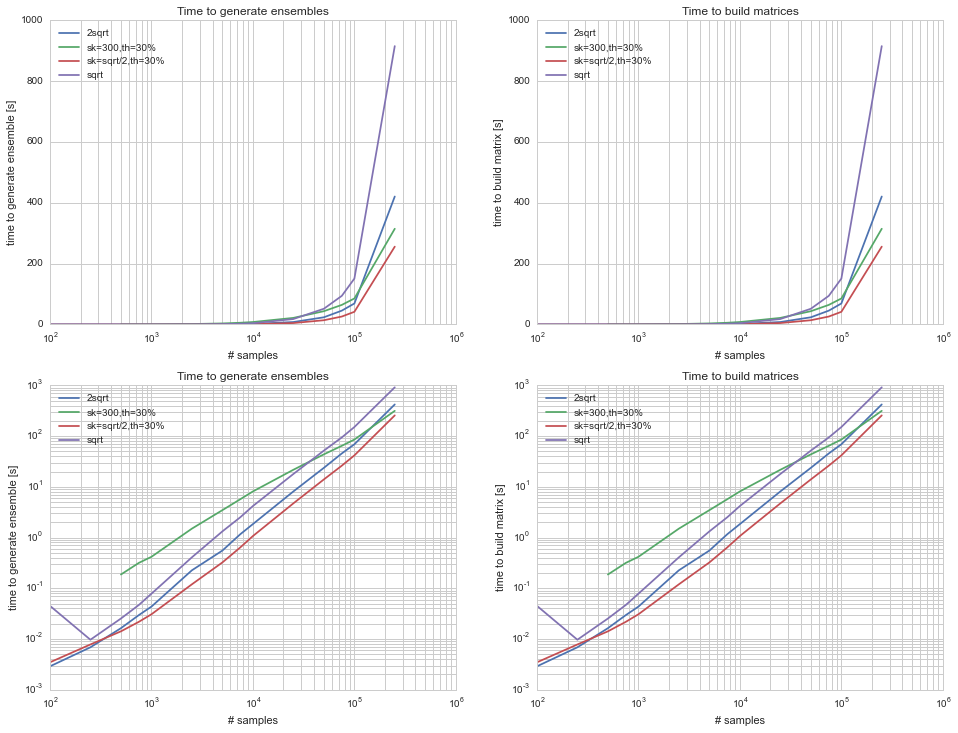

In [19]:
fig3 = plt.figure(figsize=(16,12))
sns.set_palette(sns.color_palette("deep", 6))

ax = fig3.add_subplot(221)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.t_ensemble[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to generate ensemble [s]")
ax.set_title("Time to generate ensembles")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
    
ax = fig3.add_subplot(222)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.t_build[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to build matrix [s]")
ax.set_title("Time to build matrices")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")

ax = fig3.add_subplot(223)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.t_ensemble[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to generate ensemble [s]")
ax.set_title("Time to generate ensembles")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
ax.set_yscale("log")
    
ax = fig3.add_subplot(224)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.t_build[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to build matrix [s]")
ax.set_title("Time to build matrices")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
ax.set_yscale("log")

In [20]:
from scipy.stats import linregress
for key,grp in rule_n_mean.groupby(by="rule"):
    slope, intercept, r_value, p_value, std_err = linregress(grp[['n_samples','kmin']].get_values())
    print slope, intercept, key

0.00200443673959 60.0054520554 2sqrt
0.00333353455614 0.563100014399 sk=300,th=30%
0.00400203796198 120.197170144 sk=sqrt/2,th=30%
0.00100221836979 30.0027260277 sqrt


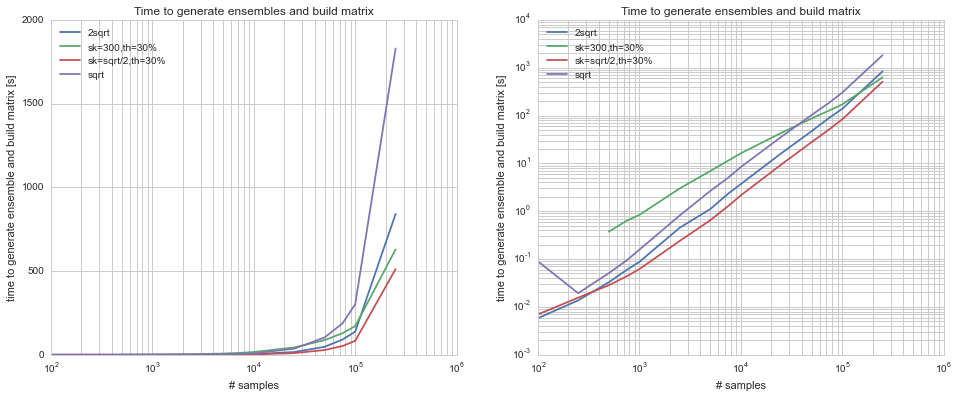

In [22]:
fig7 = plt.figure(figsize=(16,6))
sns.set_palette(sns.color_palette("deep", 6))

ax = fig7.add_subplot(121)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.t_ensemble[idx] + grp.t_build[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to generate ensemble and build matrix [s]")
ax.set_title("Time to generate ensembles and build matrix")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
    
ax = fig7.add_subplot(122)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.t_ensemble[idx] + grp.t_build[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("time to generate ensemble and build matrix [s]")
ax.set_title("Time to generate ensembles and build matrix")
ax.legend(loc="best")
ax.grid(True, which="both")
ax.set_xscale("log")
ax.set_yscale("log")


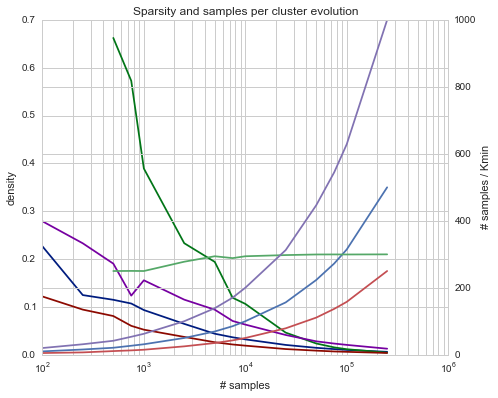

In [41]:
# double y axis example
fig4 = plt.figure(figsize=(16,6))

sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(121)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)
    #ax_s.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)
    ax_s.plot(grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx], label=key)
    #print key, grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx]

ax_s.set_ylabel("# samples / Kmin")
#ax_s.legend(loc=(1.1, 0.8), title="max_assocs")


ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity and samples per cluster evolution")
#ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")
ax_s.set_xscale("log")

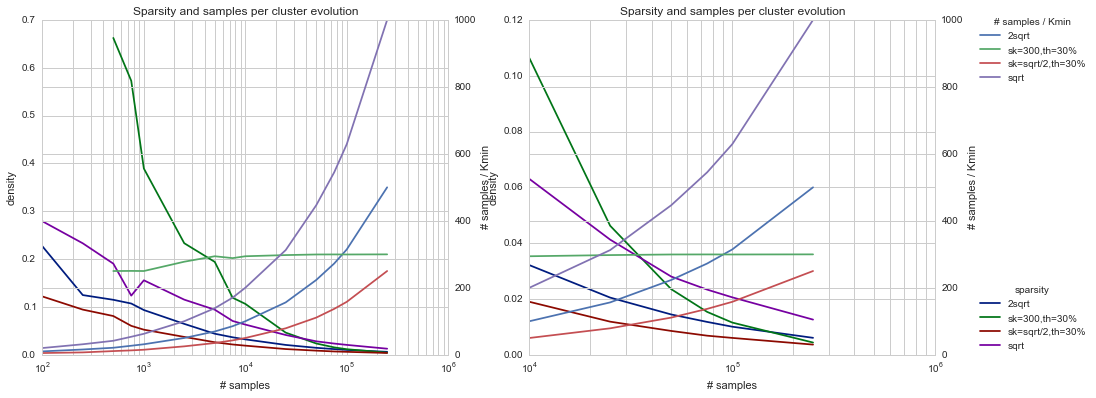

In [54]:
# double y axis example
rows = 1
cols = 2
fig4 = plt.figure(figsize=(fig_width * cols, fig_height * rows))


sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(rows,cols,1)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)
    ax_s.plot(grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx], label=key)
    #print key, grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx]

ax_s.set_ylabel("# samples / Kmin")
#ax_s.legend(loc=(1.1, 0.8), title="max_assocs")


ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity and samples per cluster evolution")
#ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")
ax_s.set_xscale("log")

sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(rows,cols,2)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e4
    ax.plot(grp[idx].n_samples, grp[idx].sparsity, label=key)    
    ax_s.plot(grp[idx].n_samples, grp[idx].samples_per_kmin[idx].get_values(), label=key)


ax_s.set_ylabel("# samples / Kmin")    
ax_s.legend(loc=(1.1, 0.8), title="# samples / Kmin")

ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity and samples per cluster evolution")
ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")
ax_s.set_xscale("log")

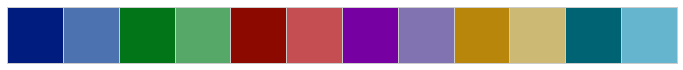

In [46]:
dark_deep_palette = list()
for (col1,col2) in zip(sns.color_palette("dark", 6),sns.color_palette("deep", 6)):
    dark_deep_palette.append(col1)
    dark_deep_palette.append(col2)
    
sns.palplot(dark_deep_palette)

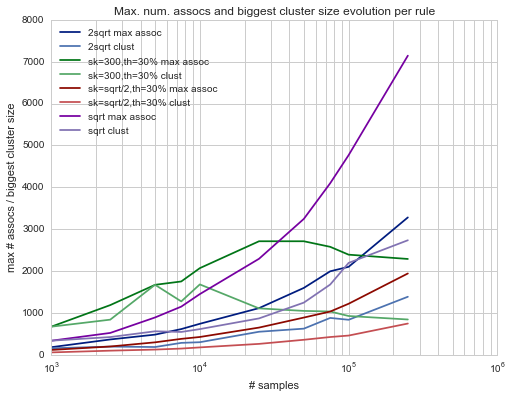

In [58]:
# double y axis example
# double y axis example
rows = 1
cols = 1
fig5 = plt.figure(figsize=(fig_width * cols, fig_height * rows))

sns.set_palette(dark_deep_palette, n_colors=len(dark_deep_palette))
ax = fig5.add_subplot(rows, cols, 1)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e3
    ax.plot(grp.n_samples[idx], grp.max_degree[idx], label=key + " max assoc")
    ax.plot(grp.n_samples[idx], grp.biggest_cluster[idx], label=key + " clust")

ax.set_xlabel("# samples")
ax.set_ylabel("max # assocs / biggest cluster size")
ax.set_title("Max. num. assocs and biggest cluster size evolution per rule")
ax.legend(loc="upper left")#(1.1, 0.0), title="Legend")
ax.grid(True, which="both")
ax.set_xscale("log")

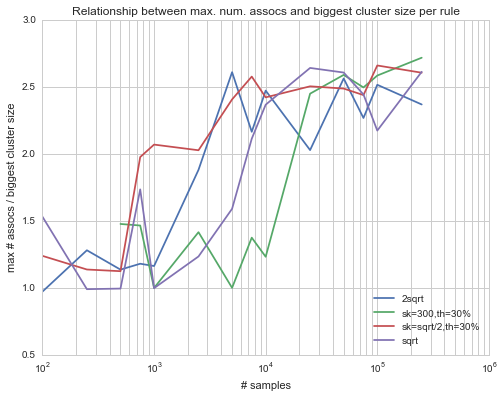

In [61]:
# double y axis example
rows = 1
cols = 1
fig6 = plt.figure(figsize=(fig_width * cols, fig_height * rows))

sns.set_palette(sns.color_palette("deep", 6))
ax = fig6.add_subplot(rows, cols, 1)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.max_degree[idx] / grp.biggest_cluster[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("max # assocs / biggest cluster size")
ax.set_title("Relationship between max. num. assocs and biggest cluster size per rule")
ax.legend(loc="lower right")#loc=(1.1, 0.0))
ax.grid(True, which="both")
ax.set_xscale("log")

In [73]:
rows = 1
cols = 1
fig7 = plt.figure(figsize=(fig_width * cols, fig_height * rows))

sns.set_palette(sns.color_palette("deep", 6))
ax = fig6.add_subplot(rows, cols, 1)
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.accuracy[idx], label=key)

ax.set_xlabel("# samples")
ax.set_ylabel("max # assocs / biggest cluster size")
ax.set_title("Relationship between max. num. assocs and biggest cluster size per rule")
ax.legend(loc="lower right")#loc=(1.1, 0.0))
ax.grid(True, which="both")
ax.set_xscale("log")

AttributeError: 'DataFrame' object has no attribute 'accuracy'

AttributeError: 'Figure' object has no attribute 'set_title'

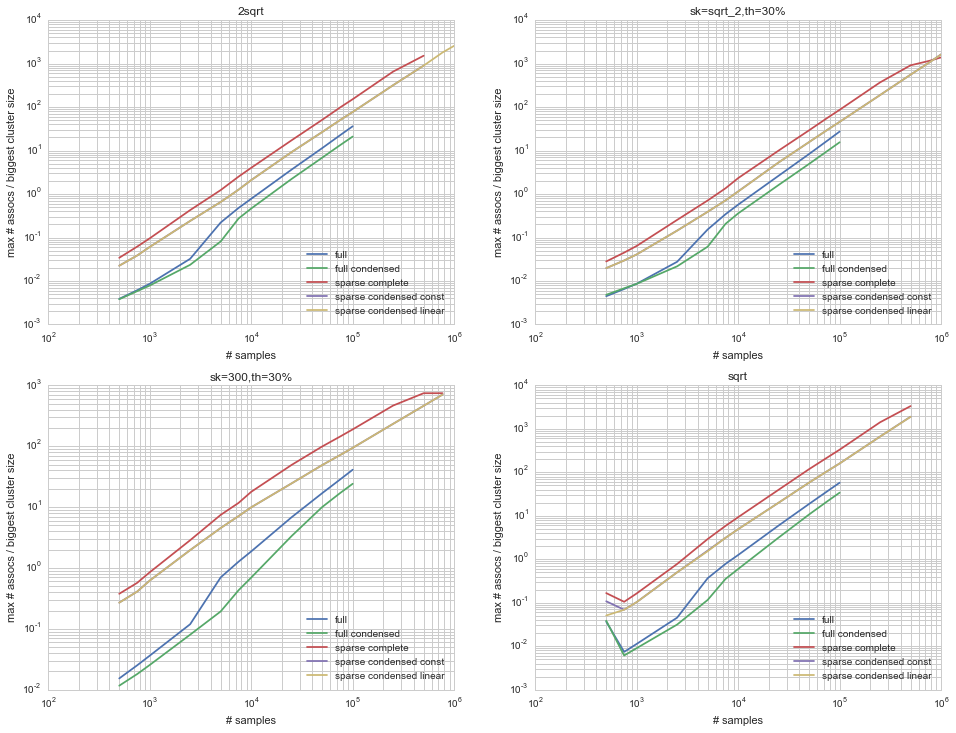

In [ ]:
# rules in different plots
rules_list = res['rule'].unique()

rows = 2
cols = 2
fig8 = plt.figure(figsize=(fig_width * cols, fig_height * rows))

ax_list = [fig8.add_subplot(rows, cols, i) for i in xrange(len(rules_list))]
ax_rule_dict = dict(zip(rules_list, ax_list))

sns.set_palette(sns.color_palette("deep", 6))

for rule, grp in rule_n_mean.groupby(by='rule'):
    for type_mat, grp2 in grp.groupby(by='type_mat'):
        idx = grp2.n_samples >= 5e2
        ax = ax_rule_dict[rule]
        ax.plot(grp2.n_samples[idx], grp2.t_build[idx], label=type_mat)

for rule, ax in ax_rule_dict.iteritems():
    ax.set_xlabel("# samples")
    ax.set_ylabel("max # assocs / biggest cluster size")
    ax.set_title(rule)
    ax.legend(loc="lower right")#loc=(1.1, 0.0))
    ax.grid(True, which="both")
    ax.set_xscale("log")
    ax.set_yscale("log")
plt.title('Coassoc build time')

In [ ]:
# rules in different plots
rules_list = res['type_mat'].unique()

rows = 2
cols = 2
fig9 = plt.figure(figsize=(fig_width * cols, fig_height * rows))

ax_list = [fig8.add_subplot(rows, cols, i) for i in xrange(len(rules_list))]
ax_rule_dict = dict(zip(rules_list, ax_list))

sns.set_palette(sns.color_palette("deep", 6))

for rule, grp in rule_n_mean.groupby(by='rule'):
    for type_mat, grp2 in grp.groupby(by='type_mat'):
        if type_mat in ('full', 'full condensed'):
            continue
        idx = grp2.n_samples >= 5e2
        ax = ax_rule_dict[rule]
        ax.plot(grp2.n_samples[idx], grp2.sparsity[idx], label=type_mat)

for rule, ax in ax_rule_dict.iteritems():
    ax.set_xlabel("# samples")
    ax.set_ylabel("max # assocs / biggest cluster size")
    ax.set_title(rule)
    ax.legend(loc="lower right")#loc=(1.1, 0.0))
    ax.grid(True, which="both")
    ax.set_xscale("log")
    ax.set_yscale("log")

In [ ]:
# double y axis example
rows = 1
cols = 2
fig8 = plt.figure(figsize=(fig_width * cols, fig_height * rows))


sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(rows,cols,1)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e2
    ax.plot(grp.n_samples[idx], grp.sparsity[idx], label=key)
    ax_s.plot(grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx], label=key)
    #print key, grp.n_samples[idx], grp.n_samples[idx] / grp.kmin[idx]

ax_s.set_ylabel("# samples / Kmin")
#ax_s.legend(loc=(1.1, 0.8), title="max_assocs")


ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity and samples per cluster evolution")
#ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")
ax_s.set_xscale("log")

sns.set_palette(sns.color_palette("dark", 10))
ax = fig4.add_subplot(rows,cols,2)
sns.set_palette(sns.color_palette("deep", 10))
ax_s = ax.twinx()
for key,grp in rule_n_mean.groupby(by="rule"):
    idx = grp.n_samples >= 1e4
    ax.plot(grp[idx].n_samples, grp[idx].sparsity, label=key)    
    ax_s.plot(grp[idx].n_samples, grp[idx].samples_per_kmin[idx].get_values(), label=key)


ax_s.set_ylabel("# samples / Kmin")    
ax_s.legend(loc=(1.1, 0.8), title="# samples / Kmin")

ax.set_xlabel("# samples")
ax.set_ylabel("density")
ax.set_title("Sparsity and samples per cluster evolution")
ax.legend(loc=(1.1, 0.0), title="sparsity")
ax.grid(True, which="both")
ax.set_xscale("log")
ax_s.set_xscale("log")

In [167]:
save_fig(fid_data,folder + "dataset")
save_fig(fig1,folder + "sparsity")
save_fig(fig2,folder + "max_assocs")
save_fig(fig3,folder + "times")
save_fig(fig4,folder + "sparsity_kmin")
save_fig(fig5,folder + "max_assoc_cluster_size")
save_fig(fig6,folder + "max_assoc_div_cluster_size")
save_fig(fig7,folder + "times_combined")